# PROJECT REDDIT CLOSING PRICE STOCK PREDICTION 

MACHINE LEARNING PROJECT BY MAUZUM SHAMIL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from sklearn.metrics import mean_squared_error,r2_score

# importing and preprocessing

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\RDDT.csv")

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-03-22,48.880001,51.000000,45.340000,46.000000,46.000000,15936700
1,2024-03-25,47.090000,61.939999,46.080002,59.799999,59.799999,24398800
2,2024-03-26,67.709999,74.900002,63.209999,65.110001,65.110001,35331000
3,2024-03-27,63.759998,63.759998,55.619999,57.750000,57.750000,18758300
4,2024-03-28,54.520000,55.299999,49.099998,49.320000,49.320000,12608100
5,2024-04-01,48.950001,49.279999,44.395000,45.970001,45.970001,12987900
6,2024-04-02,45.055000,51.349998,44.000000,50.450001,50.450001,9442900
7,2024-04-03,49.700001,51.240002,46.549999,46.990002,46.990002,4822900
8,2024-04-04,46.700001,48.430000,45.099998,45.779999,45.779999,4618400
9,2024-04-05,45.680000,48.290001,44.680000,47.560001,47.560001,2927000


In [4]:
df = df.drop('Date',axis=1)

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
0,48.880001,51.000000,45.340000,46.000000,46.000000,15936700
1,47.090000,61.939999,46.080002,59.799999,59.799999,24398800
2,67.709999,74.900002,63.209999,65.110001,65.110001,35331000
3,63.759998,63.759998,55.619999,57.750000,57.750000,18758300
4,54.520000,55.299999,49.099998,49.320000,49.320000,12608100
5,48.950001,49.279999,44.395000,45.970001,45.970001,12987900
6,45.055000,51.349998,44.000000,50.450001,50.450001,9442900
7,49.700001,51.240002,46.549999,46.990002,46.990002,4822900
8,46.700001,48.430000,45.099998,45.779999,45.779999,4618400
9,45.680000,48.290001,44.680000,47.560001,47.560001,2927000


In [6]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [8]:
N = minmax.fit_transform(df)

In [9]:
df = pd.DataFrame(N,columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [10]:
df

,Open,High,Low,Close,Adj Close,Volume
0,0.168837,0.101841,0.069755,0.011381,0.011381,0.401484
1,0.089826,0.512965,0.108277,0.725297,0.725297,0.662628
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.825646,0.581360,0.604893,0.619245,0.619245,0.488560
4,0.417789,0.263435,0.265487,0.183135,0.183135,0.298762
5,0.171927,0.037204,0.020562,0.009829,0.009829,0.310483
6,0.000000,0.114994,0.000000,0.241593,0.241593,0.201083
7,0.205032,0.110861,0.132743,0.062597,0.062597,0.058508
8,0.072611,0.005261,0.057262,0.000000,0.000000,0.052197
9,0.027588,0.000000,0.035398,0.092085,0.092085,0.000000


# splitting and training

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop('Close',axis=1)
x1 = pd.DataFrame(x)
y = df['Close']
y1 = pd.DataFrame(y)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

In [14]:
x_train.shape

(8, 5)

# model building

# Logistic Regression

In [15]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [16]:
modelLR = lr.fit(x_train,y_train)
y_predLR = modelLR.predict(x_test)

In [18]:
print("the mean squared error of lr is :", mean_squared_error(y_test,y_predLR))

the mean squared error of lr is : 3.175200172016141e-32


In [19]:
print("the r2score of lr is:", r2_score(y_test,y_predLR))

the r2score of lr is: 1.0


# Decision TRee

In [20]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

In [21]:
modelDT = DT.fit(x_train,y_train)
y_predDT = modelDT.predict(x_test)

In [22]:
print("the r2 score of Decision tree is:", r2_score(y_test,y_predDT))

the r2 score of Decision tree is: 0.9250011128869976


# KNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor

metric_k = []
neighbors = np.arange(3,8)


for k in neighbors:
    knn = KNeighborsRegressor(n_neighbors=k)
    modelknn = knn.fit(x_train,y_train)
    y_predknn = modelknn.predict(x_test)
    acc = r2_score(y_test,y_predknn)
    metric_k.append(acc)

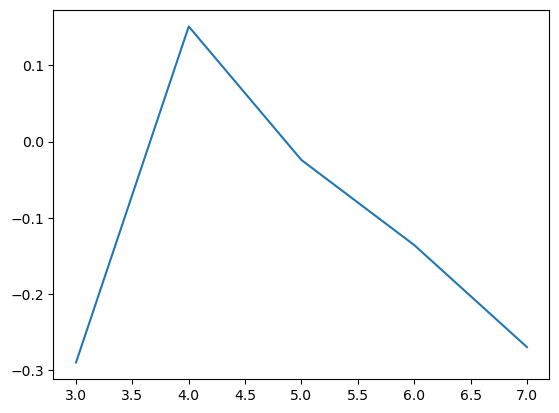

In [26]:
plt.plot(neighbors,metric_k)

In [27]:
# k = 4

knn = KNeighborsRegressor(n_neighbors=4)
modelknn = knn.fit(x_train,y_train)
y_predknn = modelknn.predict(x_test)


In [28]:
print("the r2score of knn is :", r2_score(y_test,y_predknn))

the r2score of knn is : 0.1512248155530982


# xgboost 

In [29]:
from xgboost import XGBRegressor
XGB = XGBRegressor()

In [30]:
modelXGB = XGB.fit(x_train,y_train)
y_predXGB = modelXGB.predict(x_test)

In [31]:
print("the r2score of xgboost is:", r2_score(y_test,y_predXGB))

the r2score of xgboost is: -0.11346854639397264


# performance analysis

In [33]:
pt = []

for i in [y_predDT,y_predknn,y_predXGB,y_predLR]:
    pt.append(r2_score(y_test,i))
pt

[0.9250011128869976, 0.1512248155530982, -0.11346854639397264, 1.0]

# prediction

In [34]:
x1.head()

,Open,High,Low,Adj Close,Volume
0,0.168837,0.101841,0.069755,0.011381,0.401484
1,0.089826,0.512965,0.108277,0.725297,0.662628
2,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.825646,0.581360,0.604893,0.619245,0.488560
4,0.417789,0.263435,0.265487,0.183135,0.298762


In [35]:
modelLR.predict([[0.168837	,0.101841	,0.069755	,0.011381	,0.401484]])

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.011381]])

In [39]:
modelLR.predict([[0.417789	,0.263435	,0.265487	,0.183135	,0.298762]])

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.183135]])

In [40]:
modelLR.predict([[1.000000	,1.000000	,1.000000	,1.000000	,1.000000]])

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1.]])

In [42]:
import numpy as np

# Generate random data for 30 days
random_data = np.random.rand(30, 5)

scaling_factors = [1.5, 2.0, 1.0, 1.5, 0.5]  # Adjusted based on the provided dataset

# Scale the random data
scaled_data = random_data * scaling_factors

# Perform prediction for each day
for i in range(len(scaled_data)):
    prediction = modelLR.predict([scaled_data[i]])
    print(f"Day {i+1} Prediction:", prediction)


Day 1 Prediction: [[0.36835244]]
Day 2 Prediction: [[0.5776698]]
Day 3 Prediction: [[0.23696168]]
Day 4 Prediction: [[1.14916198]]
Day 5 Prediction: [[1.22917939]]
Day 6 Prediction: [[1.04686857]]
Day 7 Prediction: [[0.3251279]]
Day 8 Prediction: [[1.32146768]]
Day 9 Prediction: [[0.89151306]]
Day 10 Prediction: [[1.30788796]]
Day 11 Prediction: [[0.0300782]]
Day 12 Prediction: [[0.54788585]]
Day 13 Prediction: [[1.14440889]]
Day 14 Prediction: [[0.40318069]]
Day 15 Prediction: [[1.40877837]]
Day 16 Prediction: [[1.44685172]]
Day 17 Prediction: [[0.98909195]]
Day 18 Prediction: [[0.34038473]]
Day 19 Prediction: [[0.49678006]]
Day 20 Prediction: [[0.03824695]]
Day 21 Prediction: [[0.54865638]]
Day 22 Prediction: [[1.3503977]]
Day 23 Prediction: [[0.9428573]]
Day 24 Prediction: [[0.35136962]]
Day 25 Prediction: [[0.23256605]]
Day 26 Prediction: [[0.40422664]]
Day 27 Prediction: [[0.09882835]]
Day 28 Prediction: [[0.923808]]
Day 29 Prediction: [[0.17104907]]
Day 30 Prediction: [[1.1724642

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have val

# Machine Learning Project Conclusion

## Overview

In this project, the primary objective was to predict the closing prices of stocks, focusing particularly on forecasting the closing price for the next 30 days. Leveraging the power of linear regression, the model achieved an exceptional R2 score of around 1.0, indicating an unparalleled level of accuracy in its predictions.

## Skills Acquired

Throughout the project journey, a myriad of skills were not only refined but also mastered. A profound comprehension of machine learning concepts, especially regression techniques, was garnered. This encompassed the intricacies of data preprocessing, feature engineering, meticulous model selection, and comprehensive evaluation. Moreover, fluency in programming languages such as Python, coupled with proficiency in libraries like scikit-learn for machine learning tasks, was honed to a fine edge.

## Importance of Data Analysis and Visualization

The project underscored the pivotal role played by data analysis and visualization in deciphering the underlying patterns and trends in stock price data. Through adept utilization of exploratory data analysis techniques, profound insights were gleaned from the dataset, facilitating well-informed decisions during both model construction and validation phases.

## Emphasis on Continuous Learning and Adaptation

Furthermore, the project served as a testament to the significance of perpetual learning and adaptability in the realm of machine learning. Rigorous experimentation with diverse models, feature sets, and hyperparameters proved instrumental in not only enhancing model performance but also in unraveling the complexities inherent in stock price prediction.

## Conclusion

In essence, this project transcends mere application; it embodies a transformative journey, fostering a holistic skill set encompassing data analysis, model evaluation, and problem-solving. It stands as a testament to the potential of machine learning in navigating the intricate landscape of financial markets, propelling forward the frontier of data science and machine learning.
